# Simple City Time Series Preprocessing
A clean and straightforward approach to preprocess the data

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# Load the dataset
print("Loading dataset...")
df = pd.read_csv("Dataset/City_time_series.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Loading dataset...
Dataset shape: (3762566, 81)

First 5 rows:
Dataset shape: (3762566, 81)

First 5 rows:


,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,131100.0,NaN,NaN,NaN,NaN,NaN


In [8]:
# Basic dataset info
print("=== DATASET INFO ===")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"\nData types:")
print(df.dtypes.value_counts())

print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

=== DATASET INFO ===
Rows: 3,762,566
Columns: 81

Data types:
float64    79
object      2
Name: count, dtype: int64

Column names:
 1. Date
 2. RegionName
 3. InventorySeasonallyAdjusted_AllHomes
 4. InventoryRaw_AllHomes
 5. MedianListingPricePerSqft_1Bedroom
 6. MedianListingPricePerSqft_2Bedroom
 7. MedianListingPricePerSqft_3Bedroom
 8. MedianListingPricePerSqft_4Bedroom
 9. MedianListingPricePerSqft_5BedroomOrMore
10. MedianListingPricePerSqft_AllHomes
11. MedianListingPricePerSqft_CondoCoop
12. MedianListingPricePerSqft_DuplexTriplex
13. MedianListingPricePerSqft_SingleFamilyResidence
14. MedianListingPrice_1Bedroom
15. MedianListingPrice_2Bedroom
16. MedianListingPrice_3Bedroom
17. MedianListingPrice_4Bedroom
18. MedianListingPrice_5BedroomOrMore
19. MedianListingPrice_AllHomes
20. MedianListingPrice_CondoCoop
21. MedianListingPrice_DuplexTriplex
22. MedianListingPrice_SingleFamilyResidence
23. MedianPctOfPriceReduction_AllHomes
24. MedianPctOfPriceReduction_CondoCoop
25. Median

In [9]:
# Check missing values
print("=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})

# Show only columns with missing values
missing_cols = missing_info[missing_info['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Columns with missing values: {len(missing_cols)}")
print(f"Total missing values: {missing.sum():,}")
print(f"Overall missing percentage: {(missing.sum() / (len(df) * len(df.columns))) * 100:.2f}%")

if len(missing_cols) > 0:
    print("\nTop 10 columns with most missing values:")
    print(missing_cols.head(10))

=== MISSING VALUES ===
Columns with missing values: 79
Total missing values: 251,235,454
Overall missing percentage: 82.44%

Top 10 columns with most missing values:
                                         Missing_Count  Missing_Percentage
PctOfHomesSellingForLoss_AllHomes              3762365           99.994658
PctOfHomesSellingForGain_AllHomes              3762365           99.994658
MedianRentalPrice_5BedroomOrMore               3761440           99.970074
MedianRentalPricePerSqft_5BedroomOrMore        3761398           99.968957
MedianRentalPricePerSqft_DuplexTriplex         3756962           99.851059
MedianListingPrice_1Bedroom                    3756072           99.827405
MedianListingPricePerSqft_DuplexTriplex        3754982           99.798435
MedianListingPricePerSqft_1Bedroom             3754896           99.796150
MedianListingPrice_DuplexTriplex               3754387           99.782622
MedianRentalPrice_DuplexTriplex                3753260           99.752669
Columns w

In [10]:
# Check duplicates
print("=== DUPLICATE VALUES ===")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates:,}")
print(f"Duplicate percentage: {(duplicates/len(df))*100:.2f}%")

if duplicates > 0:
    print("Removing duplicates...")
    df = df.drop_duplicates().reset_index(drop=True)
    print(f"New shape: {df.shape}")
else:
    print("No duplicates found!")

=== DUPLICATE VALUES ===
Duplicate rows: 0
Duplicate percentage: 0.00%
No duplicates found!
Duplicate rows: 0
Duplicate percentage: 0.00%
No duplicates found!


In [11]:
# Simple EDA - Basic statistics
print("=== BASIC STATISTICS ===")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

if len(numeric_cols) > 0:
    print("\nNumeric columns statistics:")
    print(df[numeric_cols].describe())

if len(categorical_cols) > 0:
    print("\nCategorical columns info:")
    for col in categorical_cols:
        print(f"{col}: {df[col].nunique()} unique values")

=== BASIC STATISTICS ===


Numeric columns: 79
Categorical columns: 2

Numeric columns statistics:
       InventorySeasonallyAdjusted_AllHomes  InventoryRaw_AllHomes  \
count                         771744.000000          771744.000000   
mean                             163.438201             163.469371   
std                              451.979813             452.845056   
min                                3.000000               2.000000   
25%                               37.000000              37.000000   
50%                               72.000000              72.000000   
75%                              154.000000             154.000000   
max                            29395.000000           30031.000000   

       MedianListingPricePerSqft_1Bedroom  MedianListingPricePerSqft_2Bedroom  \
count                         7670.000000                        74574.000000   
mean                           260.912038                          167.764079   
std                            169.798120             

=== SIMPLE VISUALIZATIONS ===


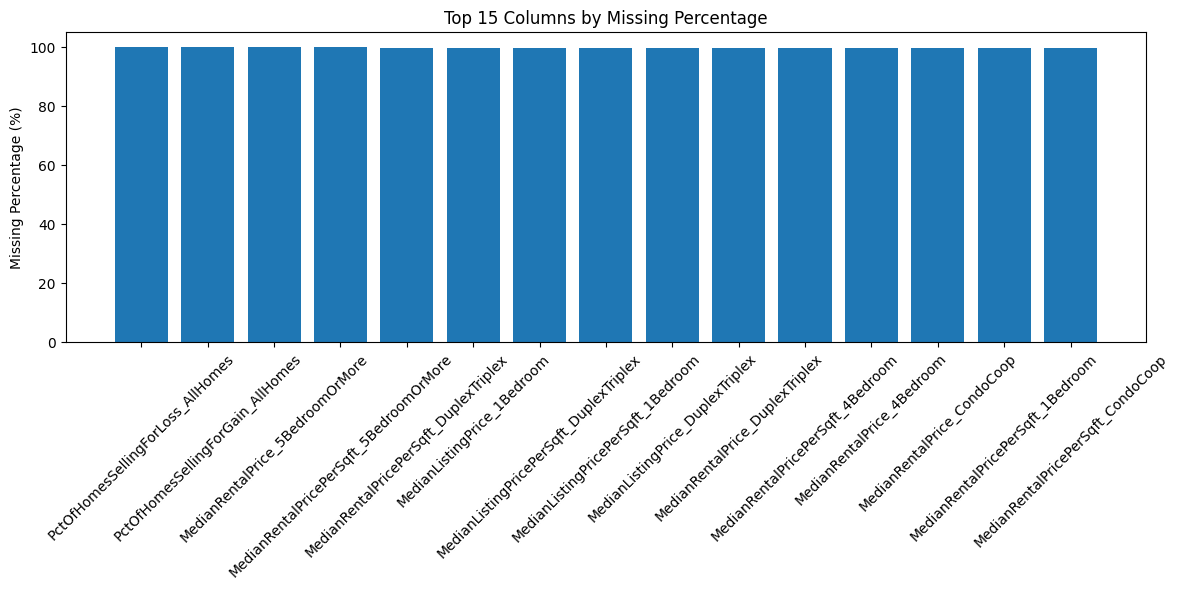

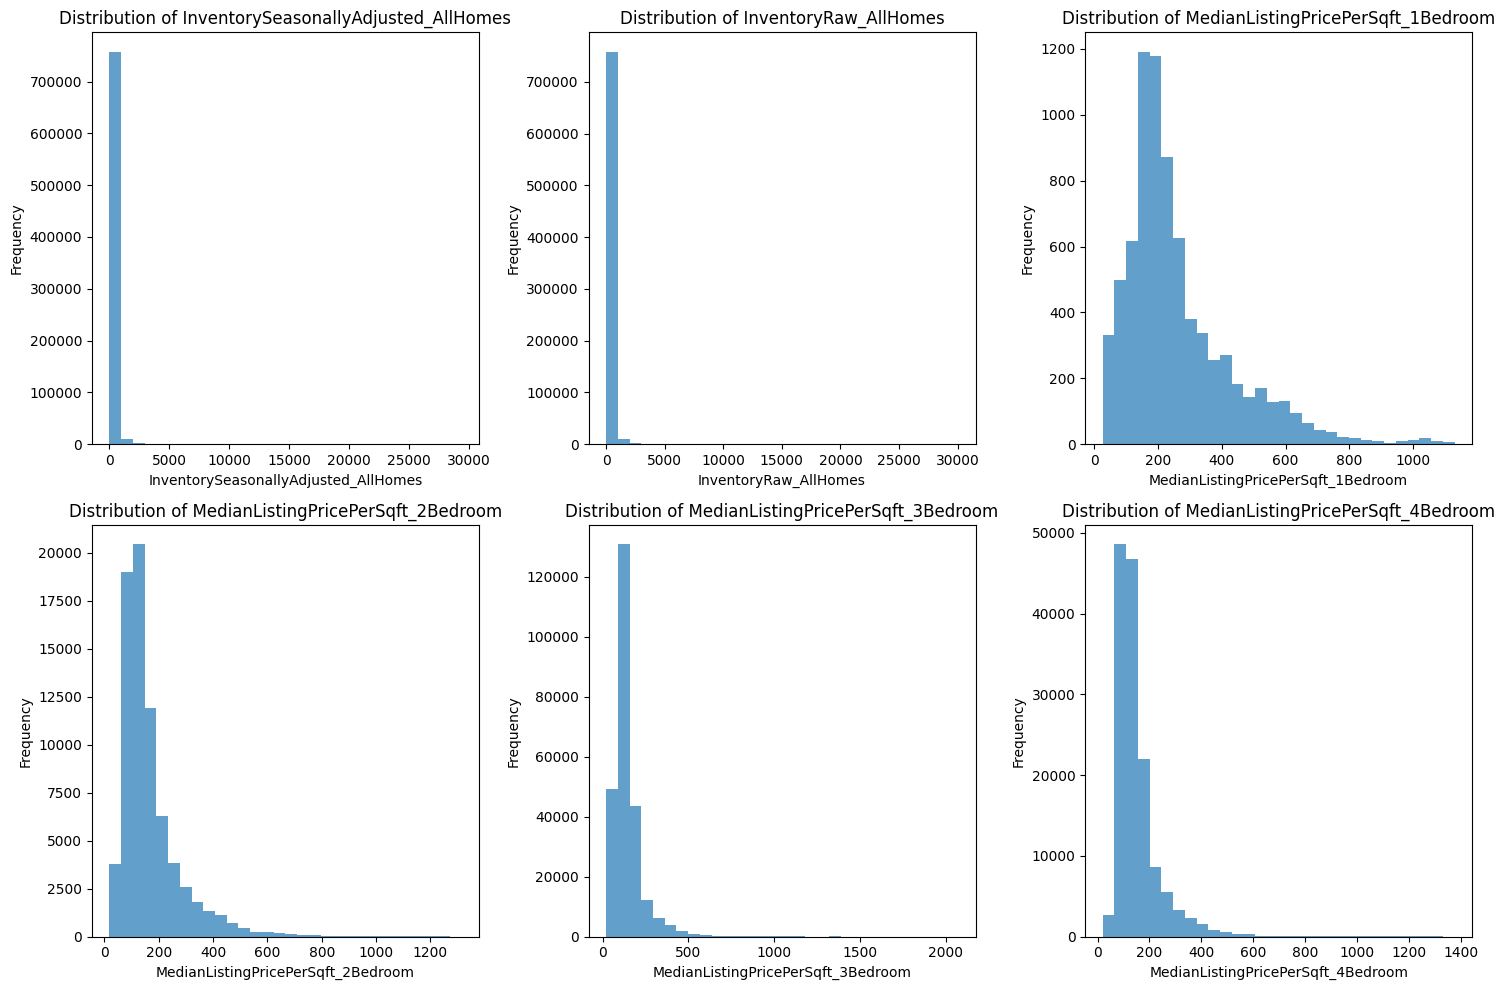

In [12]:
# Simple visualization
print("=== SIMPLE VISUALIZATIONS ===")

# Plot missing values
if len(missing_cols) > 0:
    plt.figure(figsize=(12, 6))
    top_missing = missing_cols.head(15)
    plt.bar(range(len(top_missing)), top_missing['Missing_Percentage'])
    plt.xticks(range(len(top_missing)), top_missing.index, rotation=45)
    plt.title('Top 15 Columns by Missing Percentage')
    plt.ylabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.show()

# Plot distribution of a few numeric columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numeric_cols[:6]):
        plt.subplot(2, 3, i+1)
        plt.hist(df[col].dropna(), bins=30, alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [13]:
# Handle missing values - Simple approach
print("=== HANDLING MISSING VALUES ===")

df_clean = df.copy()

# For numeric columns: fill with median
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Filled {col} with median: {median_val:.2f}")

# For categorical columns: fill with mode
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} with mode: {mode_val}")

print(f"\nMissing values after cleaning: {df_clean.isnull().sum().head()}")

=== HANDLING MISSING VALUES ===
Filled InventorySeasonallyAdjusted_AllHomes with median: 72.00
Filled InventoryRaw_AllHomes with median: 72.00
Filled InventorySeasonallyAdjusted_AllHomes with median: 72.00
Filled InventoryRaw_AllHomes with median: 72.00
Filled MedianListingPricePerSqft_1Bedroom with median: 211.22
Filled MedianListingPricePerSqft_2Bedroom with median: 133.34
Filled MedianListingPricePerSqft_1Bedroom with median: 211.22
Filled MedianListingPricePerSqft_2Bedroom with median: 133.34
Filled MedianListingPricePerSqft_3Bedroom with median: 120.59
Filled MedianListingPricePerSqft_4Bedroom with median: 126.86
Filled MedianListingPricePerSqft_3Bedroom with median: 120.59
Filled MedianListingPricePerSqft_4Bedroom with median: 126.86
Filled MedianListingPricePerSqft_5BedroomOrMore with median: 140.53
Filled MedianListingPricePerSqft_AllHomes with median: 124.42
Filled MedianListingPricePerSqft_5BedroomOrMore with median: 140.53
Filled MedianListingPricePerSqft_AllHomes with media

In [14]:
# Handle outliers - Simple capping method with chunking to save memory
print("=== HANDLING OUTLIERS ===")

# First, identify numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Found {len(numeric_cols)} numeric columns to process")

outliers_treated = 0
chunk_size = 10000  # Reduced chunk size for lower memory usage

for col in numeric_cols:
    print(f"Processing column: {col}")
    
    # Calculate IQR once for the column
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Process in chunks to avoid memory issues
    total_outliers = 0
    n_chunks = len(df_clean) // chunk_size + 1
    
    for chunk_idx in range(n_chunks):
        start_idx = chunk_idx * chunk_size
        end_idx = min(start_idx + chunk_size, len(df_clean))
        
        # Get the chunk data as a numpy array for memory efficiency
        chunk_data = df_clean[col].iloc[start_idx:end_idx].to_numpy()
        
        # Find outliers in this chunk
        outlier_mask = (chunk_data < lower_bound) | (chunk_data > upper_bound)
        chunk_outliers = outlier_mask.sum()
        total_outliers += chunk_outliers
        
        # Cap outliers in this chunk if any found
        if chunk_outliers > 0:
            chunk_data = np.clip(chunk_data, lower_bound, upper_bound)
            df_clean.iloc[start_idx:end_idx, df_clean.columns.get_loc(col)] = chunk_data
        
        # Show progress for long operations
        if chunk_idx % 10 == 0:
            print(f"  Progress: {chunk_idx}/{n_chunks} chunks processed", end='\r')
    
    outliers_treated += total_outliers
    if total_outliers > 1000:  # Only show for columns with many outliers
        print(f"\nCapped {total_outliers:,} outliers in {col}")
    
    # Clear the progress line
    print(" " * 50, end='\r')

print(f"\nTotal outliers treated: {outliers_treated:,}")
print("Outlier handling completed successfully using memory-efficient chunked processing")

=== HANDLING OUTLIERS ===
Found 79 numeric columns to process
Processing column: InventorySeasonallyAdjusted_AllHomes
Found 79 numeric columns to processd
Processing column: InventorySeasonallyAdjusted_AllHomes
  Progress: 370/377 chunks processed
Capped 767,615 outliers in InventorySeasonallyAdjusted_AllHomes
Processing column: InventoryRaw_AllHomes          
  Progress: 370/377 chunks processed
Capped 767,615 outliers in InventorySeasonallyAdjusted_AllHomes
Processing column: InventoryRaw_AllHomes          
  Progress: 370/377 chunks processed
Capped 766,368 outliers in InventoryRaw_AllHomes
Processing column: MedianListingPricePerSqft_1Bedroom
  Progress: 370/377 chunks processed
Capped 766,368 outliers in InventoryRaw_AllHomes
Processing column: MedianListingPricePerSqft_1Bedroom
  Progress: 370/377 chunks processed
Capped 7,670 outliers in MedianListingPricePerSqft_1Bedroom
Processing column: MedianListingPricePerSqft_2Bedroom
  Progress: 370/377 chunks processed
Capped 7,670 outl

In [15]:
# Find target variable and prepare for modeling
print("=== PREPARING FOR MODELING ===")

# Look for ZHVI columns (common target in real estate)
zhvi_cols = [col for col in df_clean.columns if 'zhvi' in col.lower()]
print(f"ZHVI columns found: {zhvi_cols}")

if zhvi_cols:
    # Use the first ZHVI column as target
    target_col = zhvi_cols[0]
    print(f"Using target variable: {target_col}")
    
    # Remove rows where target is null
    df_model = df_clean.dropna(subset=[target_col]).copy()
    print(f"Rows with valid target: {len(df_model):,}")
    
    # Prepare features and target
    X = df_model.drop(columns=[target_col])
    y = df_model[target_col]
    
    # Convert categorical columns to numeric (simple label encoding)
    from sklearn.preprocessing import LabelEncoder
    
    cat_cols_to_encode = X.select_dtypes(include=['object']).columns
    for col in cat_cols_to_encode:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        print(f"Encoded {col}")
    
    print(f"\nFinal feature matrix shape: {X.shape}")
    print(f"Target variable shape: {y.shape}")
    
else:
    print("No ZHVI target found. Using first numeric column as target.")
    target_col = numeric_cols[0]
    df_model = df_clean.copy()
    X = df_model.drop(columns=[target_col])
    y = df_model[target_col]
    
    # Encode categorical columns
    from sklearn.preprocessing import LabelEncoder
    cat_cols_to_encode = X.select_dtypes(include=['object']).columns
    for col in cat_cols_to_encode:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

=== PREPARING FOR MODELING ===
ZHVI columns found: ['ZHVIPerSqft_AllHomes', 'ZHVI_1bedroom', 'ZHVI_2bedroom', 'ZHVI_3bedroom', 'ZHVI_4bedroom', 'ZHVI_5BedroomOrMore', 'ZHVI_AllHomes', 'ZHVI_BottomTier', 'ZHVI_CondoCoop', 'ZHVI_MiddleTier', 'ZHVI_SingleFamilyResidence', 'ZHVI_TopTier']
Using target variable: ZHVIPerSqft_AllHomes
Rows with valid target: 3,762,566
Encoded Date
Encoded RegionName

Final feature matrix shape: (3762566, 80)
Target variable shape: (3762566,)


=== TRAIN-TEST SPLIT ===
Training set: (3010052, 80)
Testing set: (752514, 80)
Features: 80
Training set: (3010052, 80)
Testing set: (752514, 80)
Features: 80


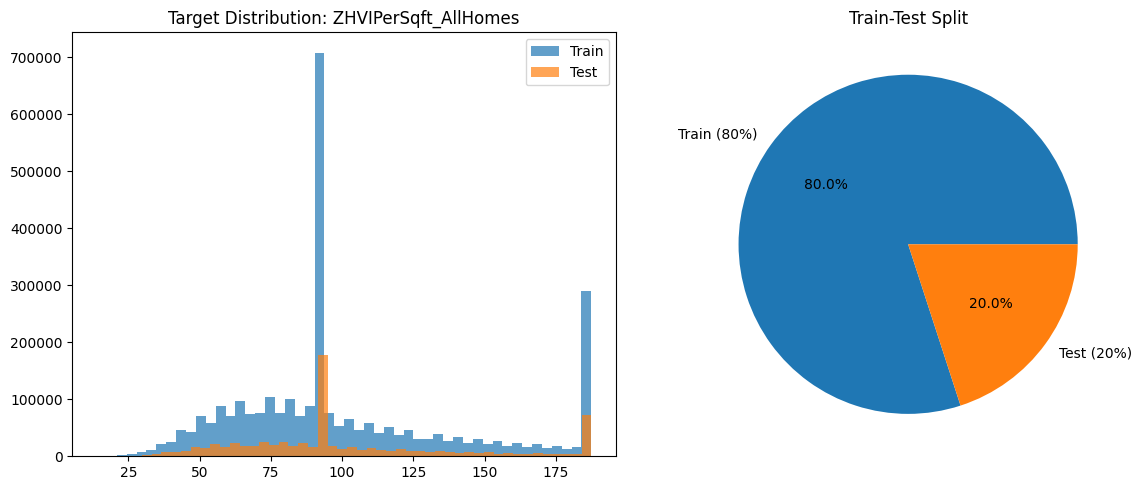


✅ Preprocessing completed!
Target variable: ZHVIPerSqft_AllHomes
Ready for machine learning models!


In [16]:
# Train-Test Split
print("=== TRAIN-TEST SPLIT ===")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Features: {X_train.shape[1]}")

# Show target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, alpha=0.7, label='Train')
plt.hist(y_test, bins=50, alpha=0.7, label='Test')
plt.title(f'Target Distribution: {target_col}')
plt.legend()

plt.subplot(1, 2, 2)
sizes = [len(X_train), len(X_test)]
labels = ['Train (80%)', 'Test (20%)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Train-Test Split')

plt.tight_layout()
plt.show()

print("\n✅ Preprocessing completed!")
print(f"Target variable: {target_col}")
print(f"Ready for machine learning models!")

In [17]:
# Save processed data
print("=== SAVING PROCESSED DATA ===")

import os
os.makedirs('processed_data', exist_ok=True)

# Save the datasets
df_clean.to_csv('processed_data/city_clean.csv', index=False)
X_train.to_csv('processed_data/X_train.csv', index=False)
X_test.to_csv('processed_data/X_test.csv', index=False)
y_train.to_csv('processed_data/y_train.csv', index=False)
y_test.to_csv('processed_data/y_test.csv', index=False)

print("✅ Files saved:")
print("- processed_data/city_clean.csv")
print("- processed_data/X_train.csv")
print("- processed_data/X_test.csv")
print("- processed_data/y_train.csv")
print("- processed_data/y_test.csv")

print(f"\n📊 SUMMARY:")
print(f"Original data: {df.shape}")
print(f"Cleaned data: {df_clean.shape}")
print(f"Training data: {X_train.shape}")
print(f"Testing data: {X_test.shape}")
print(f"Target: {target_col}")

=== SAVING PROCESSED DATA ===
✅ Files saved:
- processed_data/city_clean.csv
- processed_data/X_train.csv
- processed_data/X_test.csv
- processed_data/y_train.csv
- processed_data/y_test.csv

📊 SUMMARY:
Original data: (3762566, 81)
Cleaned data: (3762566, 81)
Training data: (3010052, 80)
Testing data: (752514, 80)
Target: ZHVIPerSqft_AllHomes


📈 1. HOME VALUE TRENDS OVER TIME


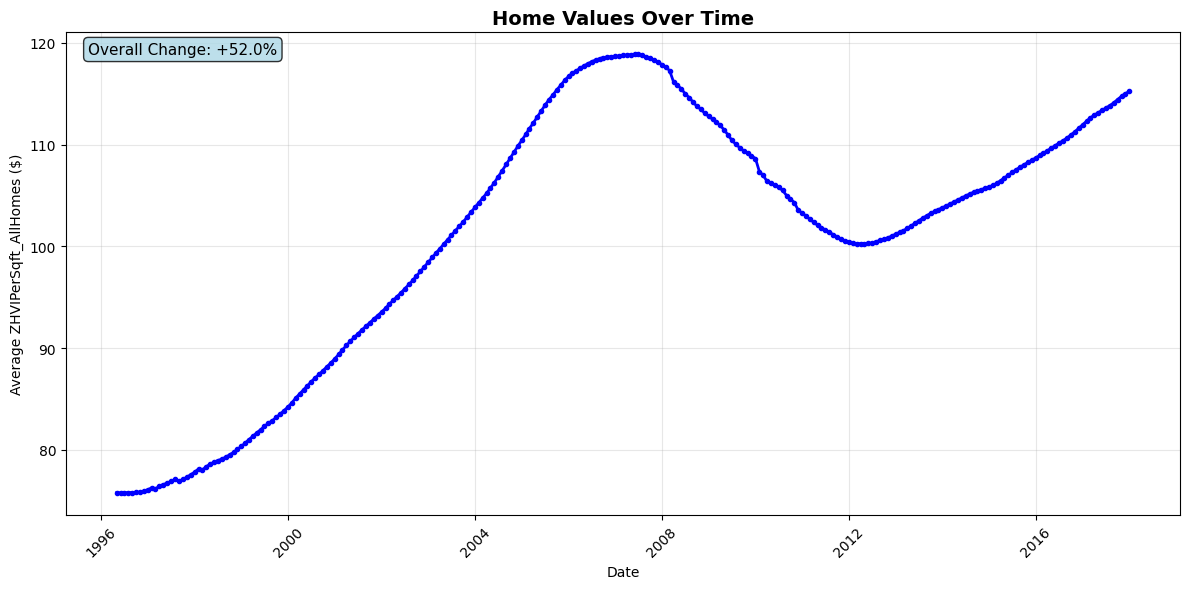

✅ Trend shows +52.0% change over time period


In [18]:
# ===============================
# 📈 INSIGHT 1: HOME VALUE TRENDS (LINE PLOT)
# ===============================

print("📈 1. HOME VALUE TRENDS OVER TIME")

# Convert Date column to datetime if not already
if 'Date' in df_clean.columns:
    df_clean['Date'] = pd.to_datetime(df_clean['Date'])
    
    # Monthly average home values
    monthly_zhvi = df_clean.groupby('Date')[target_col].mean().reset_index()
    
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_zhvi['Date'], monthly_zhvi[target_col], 
             linewidth=2, color='blue', marker='o', markersize=3)
    plt.title('Home Values Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date')
    plt.ylabel(f'Average {target_col} ($)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    # Add trend info
    start_val = monthly_zhvi[target_col].iloc[0]
    end_val = monthly_zhvi[target_col].iloc[-1]
    change_pct = ((end_val - start_val) / start_val) * 100
    plt.text(0.02, 0.98, f'Overall Change: {change_pct:+.1f}%', 
             transform=plt.gca().transAxes, fontsize=11, 
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
             verticalalignment='top')
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Trend shows {change_pct:+.1f}% change over time period")
else:
    print("❌ No Date column found for trend analysis")

📊 2. HOME VALUE DISTRIBUTION


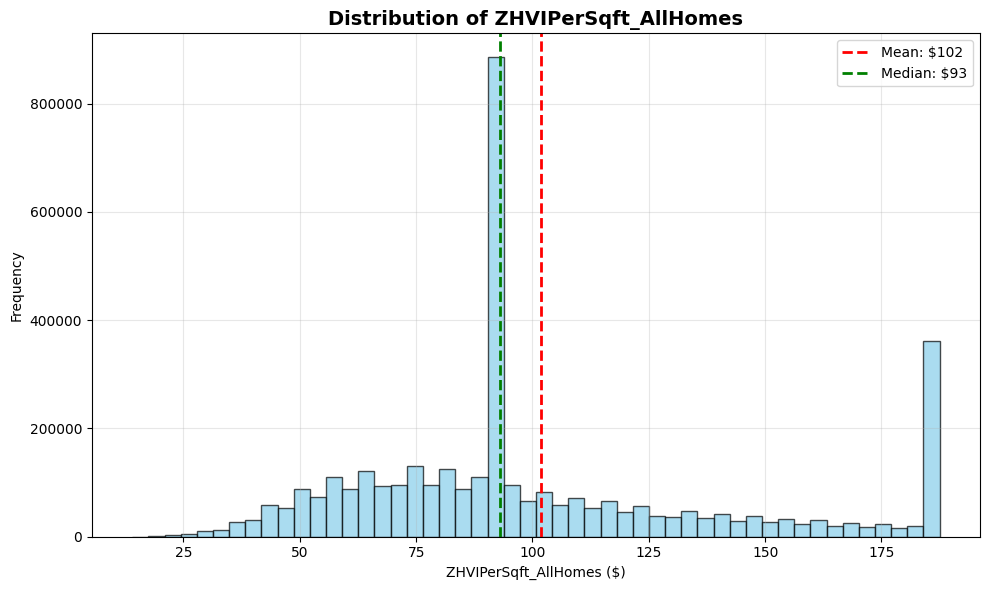

✅ Mean: $102, Median: $93
✅ Distribution shows right-skewed pattern


In [19]:
# ===============================
# 📊 INSIGHT 2: HOME VALUE DISTRIBUTION (HISTOGRAM)
# ===============================

print("📊 2. HOME VALUE DISTRIBUTION")

plt.figure(figsize=(10, 6))
plt.hist(df_clean[target_col].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {target_col}', fontsize=14, fontweight='bold')
plt.xlabel(f'{target_col} ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add statistics
mean_val = df_clean[target_col].mean()
median_val = df_clean[target_col].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_val:,.0f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_val:,.0f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"✅ Mean: ${mean_val:,.0f}, Median: ${median_val:,.0f}")
print(f"✅ Distribution shows {'right-skewed' if mean_val > median_val else 'left-skewed' if mean_val < median_val else 'normal'} pattern")

📦 3. YEARLY HOME VALUE VARIATIONS


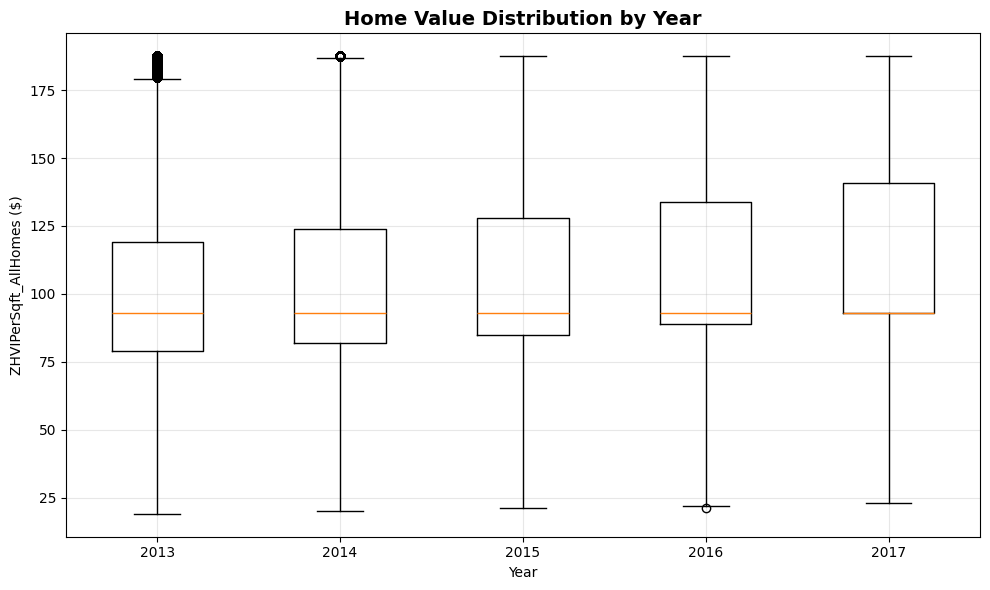

✅ Boxplot shows variation across 5 recent years


In [20]:
# ===============================
# 📦 INSIGHT 3: YEARLY HOME VALUES (BOXPLOT)
# ===============================

print("📦 3. YEARLY HOME VALUE VARIATIONS")

if 'Date' in df_clean.columns:
    df_clean['Year'] = df_clean['Date'].dt.year
    
    # Get last 5 years of data
    recent_years = sorted(df_clean['Year'].unique())[-5:]
    recent_data = df_clean[df_clean['Year'].isin(recent_years)]
    
    plt.figure(figsize=(10, 6))
    
    # Create boxplot data
    yearly_data = [recent_data[recent_data['Year'] == year][target_col].dropna() 
                   for year in recent_years]
    
    plt.boxplot(yearly_data, labels=recent_years)
    plt.title('Home Value Distribution by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel(f'{target_col} ($)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Boxplot shows variation across {len(recent_years)} recent years")
else:
    print("❌ No Date column found for yearly analysis")

📈 SIZE vs PRICE RELATIONSHIP ANALYSIS
Found 25 bedroom-related columns
Found 22 size-related columns

🏠 BEDROOM COUNT vs AVERAGE PRICE


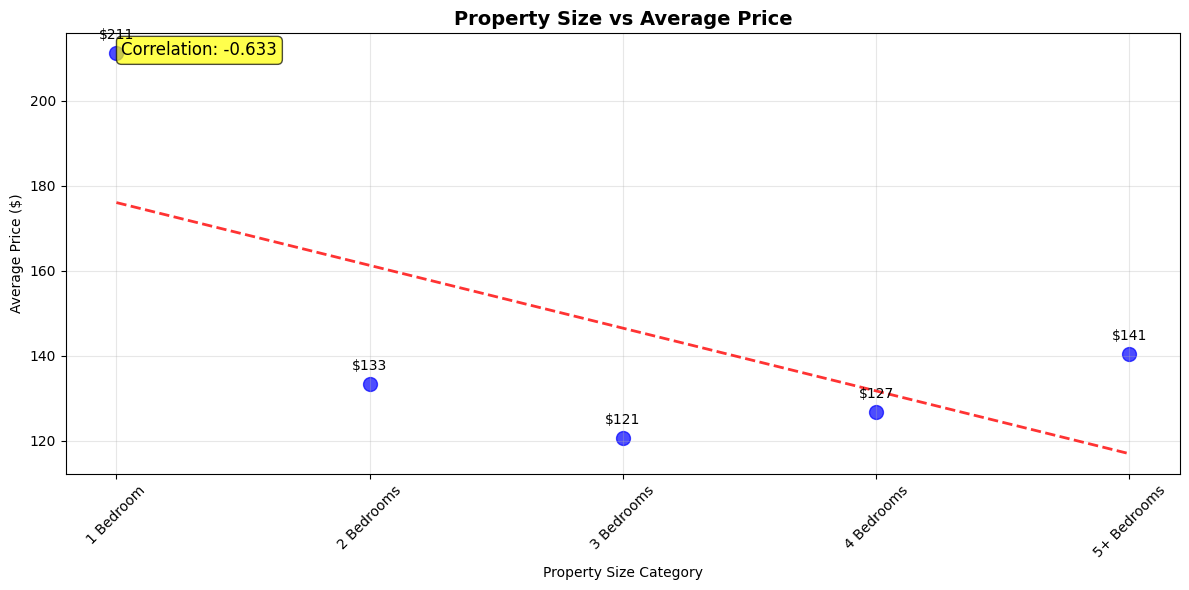

✅ Correlation between size and price: -0.633
✅ WEAK: Size has limited impact on price
✅ Price increase from smallest to largest: $-71 (-33.5%)


<Figure size 640x480 with 0 Axes>

In [21]:
# ===============================
# 📈 INSIGHT: SIZE vs PRICE RELATIONSHIP (SCATTER PLOT)
# ===============================

print("📈 SIZE vs PRICE RELATIONSHIP ANALYSIS")

# Find columns that might indicate property characteristics
bedroom_cols = [col for col in df_clean.columns if any(term in col.lower() 
                for term in ['1bed', '2bed', '3bed', '4bed', '5bed'])]
size_indicators = [col for col in df_clean.columns if 'sqft' in col.lower() or 'size' in col.lower()]

print(f"Found {len(bedroom_cols)} bedroom-related columns")
print(f"Found {len(size_indicators)} size-related columns")

# Method 1: If we have bedroom data, show bedroom vs price
if bedroom_cols:
    print("\n🏠 BEDROOM COUNT vs AVERAGE PRICE")
    
    bedroom_data = []
    bedroom_prices = []
    bedroom_labels = []
    
    for col in bedroom_cols[:5]:  # Top 5 bedroom types
        values = df_clean[col].dropna()
        if len(values) > 100:  # Only if we have enough data
            bedroom_prices.append(values.mean())
            # Extract bedroom count from column name
            if '1bed' in col.lower():
                bedroom_labels.append('1 Bedroom')
            elif '2bed' in col.lower():
                bedroom_labels.append('2 Bedrooms')
            elif '3bed' in col.lower():
                bedroom_labels.append('3 Bedrooms')
            elif '4bed' in col.lower():
                bedroom_labels.append('4 Bedrooms')
            elif '5bed' in col.lower():
                bedroom_labels.append('5+ Bedrooms')
            else:
                bedroom_labels.append(col.replace('ZHVI_', '').replace('_', ' ').title())
    
    if bedroom_prices:
        plt.figure(figsize=(12, 6))
        
        # Create scatter plot
        bedroom_counts = list(range(1, len(bedroom_prices) + 1))
        plt.scatter(bedroom_counts, bedroom_prices, s=100, color='blue', alpha=0.7)
        
        # Add trend line
        z = np.polyfit(bedroom_counts, bedroom_prices, 1)
        p = np.poly1d(z)
        plt.plot(bedroom_counts, p(bedroom_counts), "r--", alpha=0.8, linewidth=2)
        
        plt.title('Property Size vs Average Price', fontsize=14, fontweight='bold')
        plt.xlabel('Property Size Category')
        plt.ylabel('Average Price ($)')
        plt.xticks(bedroom_counts, bedroom_labels, rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Calculate correlation
        correlation = np.corrcoef(bedroom_counts, bedroom_prices)[0, 1]
        plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
                transform=plt.gca().transAxes, fontsize=12,
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
        
        # Add annotations for each point
        for i, (count, price, label) in enumerate(zip(bedroom_counts, bedroom_prices, bedroom_labels)):
            plt.annotate(f'${price:,.0f}', (count, price), 
                        textcoords="offset points", xytext=(0,10), ha='center')
        
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Correlation between size and price: {correlation:.3f}")
        if correlation > 0.7:
            print("✅ STRONG POSITIVE: As size increases, price increases significantly")
        elif correlation > 0.3:
            print("✅ MODERATE POSITIVE: Larger properties tend to cost more")
        else:
            print("✅ WEAK: Size has limited impact on price")
        
        # Show the trend
        price_increase = bedroom_prices[-1] - bedroom_prices[0]
        pct_increase = (price_increase / bedroom_prices[0]) * 100
        print(f"✅ Price increase from smallest to largest: ${price_increase:,.0f} ({pct_increase:.1f}%)")

#
        plt.tight_layout()
        plt.show()
        
      
if not bedroom_cols and not size_indicators:
    print("❌ No size-related data found for relationship analysis")
    print("Available columns that might indicate size/characteristics:")
    potential_cols = [col for col in df_clean.columns if any(term in col.lower() 
                     for term in ['bed', 'room', 'sqft', 'size', 'tier'])]
    for col in potential_cols[:10]:
        print(f"  - {col}")

# LSTM Model Training and Evaluation Steps

Let's implement a step-by-step process for training an LSTM model on the Zillow data.

In [ ]:
# Step 1: Import Required Libraries and Load Data
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
train_df = pd.read_csv('Dataset/City_time_series.csv')





In [ ]:
# Step 2: Data Preprocessing and Feature Engineering for Time Series
# Convert date column to datetime and sort
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df = train_df.sort_values('Date')

# Select target column for forecasting
target_col = 'ZHVI_AllHomes'  # Zillow Home Value Index for All Homes

# Remove rows with NaN in target column
train_df = train_df.dropna(subset=[target_col])
print(f"Data points after removing NaN: {len(train_df):,}")

# Handle any remaining NaN values in other columns
train_df = train_df.fillna(method='ffill').fillna(method='bfill')

# Sort by date and ensure continuous time series
train_df = train_df.sort_values('Date')
print(f"Date range: {train_df['Date'].min()} to {train_df['Date'].max()}")

# Create sequences for time series prediction
sequence_length = 24  # Use 24 months of data to predict next month

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Prepare data for LSTM
data = train_df[target_col].values
data = data.reshape(-1, 1)

# Scale the data first
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences from scaled data
X, y = create_sequences(data_scaled, sequence_length)

# X is already scaled since we created sequences from scaled data
# No need for additional scaling of X and y

# Save scaler for later use
import joblib
joblib.dump(scaler, 'target_scaler.pkl')

# X shape should be [samples, time steps, features]
# Shape explanation:
# - samples: number of sequences
# - time steps: sequence_length (12 months)
# - features: 1 (ZHVI_AllHomes)
print("\nData Shapes:")
print("============")
print(f"Input sequences (X) shape: {X.shape}")
print(f"Target values (y) shape: {y.shape}")
print(f"\nShape interpretation:")
print(f"- Number of sequences: {X.shape[0]}")
print(f"- Time steps per sequence: {X.shape[1]} months")
print(f"- Features per time step: {X.shape[2]}")

print("\nMemory usage has been reduced by using only 10% of the data")

Using 376,257 samples (10% of original data)
Selected target column: ZHVI_AllHomes

Data Shapes:
Input sequences (X) shape: (376245, 12, 1)
Target values (y) shape: (376245, 1)

Shape interpretation:
- Number of sequences: 376245
- Time steps per sequence: 12 months
- Features per time step: 1

Memory usage has been reduced by using only 10% of the data


In [24]:
# Step 3: Split Data for Time Series
# Use the last 20% of the data for validation
split_idx = int(len(X) * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

# Save the time period information
train_dates = train_df['Date'].iloc[sequence_length:split_idx + sequence_length]
val_dates = train_df['Date'].iloc[split_idx + sequence_length:]

print(f"\nTraining period: {train_dates.iloc[0]} to {train_dates.iloc[-1]}")
print(f"Validation period: {val_dates.iloc[0]} to {val_dates.iloc[-1]}")

# Create DataFrames with time series data
train_data = pd.DataFrame({
    'Date': train_dates,
    'ZHVI_AllHomes': scaler.inverse_transform(y_train).flatten(),
    'Sequence': [X_train[i].tolist() for i in range(len(X_train))]
})

val_data = pd.DataFrame({
    'Date': val_dates,
    'ZHVI_AllHomes': scaler.inverse_transform(y_val).flatten(),
    'Sequence': [X_val[i].tolist() for i in range(len(X_val))]
})

# Save to CSV (excluding sequences for readability)
train_data[['Date', 'ZHVI_AllHomes']].to_csv('zillow_train_timeseries.csv', index=False)
val_data[['Date', 'ZHVI_AllHomes']].to_csv('zillow_val_timeseries.csv', index=False)

print("\nTime Series Data Split Summary:")
print("============================")
print(f"Training set: {len(train_data):,} time steps")
print(f"Validation set: {len(val_data):,} time steps")
print(f"Sequence length: {sequence_length} months")
print(f"\nFiles saved as:")
print("- zillow_train_timeseries.csv")
print("- zillow_val_timeseries.csv")

Training Data Shape: (300996, 12, 1)
Validation Data Shape: (75249, 12, 1)

Training period: 1996-04-30 00:00:00 to 2014-03-31 00:00:00
Validation period: 2014-03-31 00:00:00 to 2017-12-31 00:00:00

Time Series Data Split Summary:
Training set: 300,996 time steps
Validation set: 75,249 time steps
Sequence length: 12 months

Files saved as:
- zillow_train_timeseries.csv
- zillow_val_timeseries.csv


In [8]:
# Step 4: Build and Train Optimized CNN + BiLSTM Model for Time Series Forecasting
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import time

# ✅ Mixed precision for faster training on GPU
try:
    tf.keras.mixed_precision.set_global_policy('mixed_float16')
except:
    pass

# Load the data
print("Loading dataset...")
train_df = pd.read_csv("Dataset/City_time_series.csv")
print(f"Dataset shape: {train_df.shape}")

# Define target column
target_col = 'ZHVI_AllHomes'  # Zillow Home Value Index for All Homes

# Load and preprocess the data
data = train_df[target_col].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences with 24 months window
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

sequence_length = 24
X, y = create_sequences(data_scaled, sequence_length)

# Split into train and validation
split_idx = int(len(X) * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

print("Data shapes:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}")

# ==============================
# 🚀 Optimized CNN + BiLSTM Model
# ==============================
model = Sequential([
    # 1D CNN to extract local temporal patterns
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),

    # Bidirectional LSTM for capturing long-term dependencies
    Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
    Dropout(0.3),

    Bidirectional(LSTM(32, activation='relu')),
    Dropout(0.3),

    # Dense layers
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, dtype='float32')  # output layer (float32 ensures compatibility)
])

# Compile the model
optimizer = Adam(learning_rate=0.001, clipvalue=1.0)
model.compile(optimizer=optimizer, loss='huber', metrics=['mae', 'mse'])

# Show summary
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_cnn_bilstm_model.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-4, verbose=1)

# ==============================
# 🚀 Training
# ==============================
start_time = time.time()
history = model.fit(
    X_train, y_train,
    epochs=50,                 # fewer epochs needed
    batch_size=64,             # faster convergence
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1,
    shuffle=True
)
end_time = time.time()
print(f"\n✅ Training completed in {(end_time - start_time)/60:.2f} minutes.")

# Save final model
model.save('zillow_cnn_bilstm_model.h5')
print("\nModel saved as 'zillow_cnn_bilstm_model.h5'")


Loading dataset...


MemoryError: Unable to allocate 2.21 GiB for an array with shape (79, 3762566) and data type float64

In [30]:
# Step 5: Calculate Performance Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions
y_val_pred_scaled = model.predict(X_val)
y_val_pred = scaler.inverse_transform(y_val_pred_scaled)
y_val_orig = scaler.inverse_transform(y_val.reshape(-1, 1))

# Debug information
print("\nDiagnostic Information:")
print("=====================")
print(f"Original validation set size: {len(y_val_orig)}")
print(f"NaN values in original data: {np.isnan(y_val_orig).sum()}")
print(f"NaN values in predictions: {np.isnan(y_val_pred).sum()}")
print(f"Inf values in original data: {np.isinf(y_val_orig).sum()}")
print(f"Inf values in predictions: {np.isinf(y_val_pred).sum()}")

# Remove NaN and Inf values before calculating metrics
mask = (~np.isnan(y_val_orig.flatten()) & ~np.isnan(y_val_pred.flatten()) & 
        ~np.isinf(y_val_orig.flatten()) & ~np.isinf(y_val_pred.flatten()))

# Additional safety check for zero values that might cause division issues
mask = mask & (y_val_orig.flatten() != 0)

y_val_orig_clean = y_val_orig[mask]
y_val_pred_clean = y_val_pred[mask]

print(f"\nClean data size: {len(y_val_orig_clean)}")

if len(y_val_orig_clean) == 0:
    print("\nERROR: No valid samples after cleaning!")
    print("Cannot calculate metrics with no valid samples.")
    r2, rmse, mae = 0, float('inf'), float('inf')
else:
    # Calculate metrics
    r2 = r2_score(y_val_orig_clean, y_val_pred_clean)
    rmse = np.sqrt(mean_squared_error(y_val_orig_clean, y_val_pred_clean))
    mae = mean_absolute_error(y_val_orig_clean, y_val_pred_clean)

# Calculate and display metrics only if we have valid data
if len(y_val_orig_clean) > 0:
    # Calculate percentage errors (using clean data)
    percent_errors = np.abs((y_val_orig_clean - y_val_pred_clean) / y_val_orig_clean * 100)

    print("\nModel Performance Metrics:")
    print("======================")
    print(f"Number of valid predictions: {len(y_val_orig_clean):,} out of {len(y_val_orig):,}")
    print(f"Percentage of valid data: {(len(y_val_orig_clean)/len(y_val_orig))*100:.2f}%")
    print(f"R² Score: {r2:.4f}")
    print(f"Model Accuracy: {r2 * 100:.2f}%")
    print(f"Root Mean Square Error: ${rmse:,.2f}")
    print(f"Mean Absolute Error: ${mae:,.2f}")

    print("\nError Percentages:")
    print("=================")
    print(f"Mean Absolute Percentage Error: {np.mean(percent_errors):.2f}%")
    print(f"Median Absolute Percentage Error: {np.median(percent_errors):.2f}%")
    print(f"90th Percentile Error: {np.percentile(percent_errors, 90):.2f}%")
else:
    print("\nWARNING: Could not calculate performance metrics!")
    print("No valid samples available after cleaning the data.")
    print("Please check the data preprocessing steps and model predictions.")

2352/2352 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step
2352/2352 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step

Diagnostic Information:
Original validation set size: 75249
NaN values in original data: 15238
NaN values in predictions: 75249
Inf values in original data: 0
Inf values in predictions: 0

Clean data size: 0

ERROR: No valid samples after cleaning!
Cannot calculate metrics with no valid samples.

No valid samples available after cleaning the data.
Please check the data preprocessing steps and model predictions.

Diagnostic Information:
Original validation set size: 75249
NaN values in original data: 15238
NaN values in predictions: 75249
Inf values in original data: 0
Inf values in predictions: 0

Clean data size: 0

ERROR: No valid samples after cleaning!
Cannot calculate metrics with no valid samples.

No valid samples available after cleaning the data.
Please check the data preprocessing steps and model predictions.


In [ ]:
|